In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd 
import math


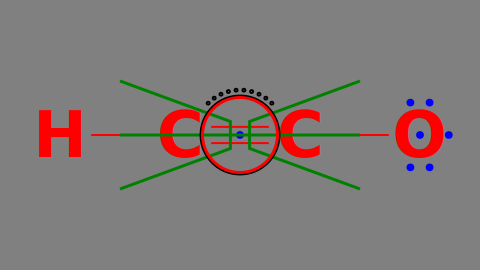

In [89]:
width = 480
height = 270

#SVG starting construction

SVG = '<?xml version="1.0" encoding="utf-8"?>\n'
SVG += '<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n'
SVG += f'<svg id="image" width="{width}px" height="{height}px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">'

SVG += '<rect x="0" y="0" width="100%" height="100%" style="fill:gray" /> \n'

#center circle
SVG += '<circle cx="50%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'

#************C2HO text 

textOffset_x = 12.5
textStep_x = 100*0.25
text = ['H', 'C', 'C', 'O']
for i in range(4):
    SVG += '<text x="'+ str(textOffset_x + i * textStep_x) +'%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">'+text[i]+'</text>'
    #SVG += '  <rect id="BG" width="100%" height="100%" fill="url(#BG-grad2)" style="mix-blend-mode: screen;" opacity="1" />\n\n'

#Lines
lineOffset = 19
lineLenght = 12
lineHeight = 3
SVG += '<line x1="'+ str(lineOffset + 0 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 0 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="' + str(50 - lineHeight) + '%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="' + str(50 - lineHeight) + '%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 1 * textStep_x) +'%" y1="' + str(50 + lineHeight) + '%" x2="'+ str(lineOffset + 1 * textStep_x + lineLenght) +'%" y2="' + str(50 + lineHeight) + '%" style="stroke:rgb(255,0,0);stroke-width:2" />'
SVG += '<line x1="'+ str(lineOffset + 2 * textStep_x) +'%" y1="50%" x2="'+ str(lineOffset + 2 * textStep_x + lineLenght) +'%" y2="50%" style="stroke:rgb(255,0,0);stroke-width:2" />'

#Circles in O
#--Center in O for guidance
centerRef_circles = textOffset_x + 3 * textStep_x
SVG += '<circle cx="'+ str(centerRef_circles) +'%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'

sep_x_circles = 2
offset_y_circles = 12
dirs_circles = [[-1, -1], [1, -1], [-1, 1], [1, 1]]
for i in range(4):
    SVG += '<circle cx="'+ str(centerRef_circles + dirs_circles[i][0] * sep_x_circles) +'%" cy="' + str(50 + dirs_circles[i][1] * offset_y_circles) + '%" r="1%" stroke="black" stroke-width="0" fill="blue" />'
SVG += '<circle cx="'+ str(centerRef_circles + sep_x_circles * 3) +'%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" />'


#************ C2HO Logo *************
def perc2pixels_x(perc):
    return str(width *perc /100);

def perc2pixels_y(perc):
    return str(height *perc /100);

def avg_perc(perc):
    return (float(perc2pixels_x(perc)) + float(perc2pixels_y(perc))) * 0.5
    
#************paths
side_x = 25
side_y = 30
middle_x = 48
middle_y = 45
#path left
SVG += ('<path d="M'+perc2pixels_x(side_x)+' '+perc2pixels_y(side_y)+' L'+perc2pixels_x(middle_x)+' '+perc2pixels_y(middle_y) +
        ' L' + perc2pixels_x(middle_x) + ' '+perc2pixels_y( 100 - middle_y) + ' L' + perc2pixels_x(side_x) + ' '+perc2pixels_y(100 -side_y) +
        '" stroke="green" stroke-width="3" fill="none"/>')
#path right
SVG += ('<path d="M'+perc2pixels_x(100 - side_x)+' '+perc2pixels_y(side_y)+' L'+perc2pixels_x(100 - middle_x)+' '+perc2pixels_y(middle_y) +
        ' L' + perc2pixels_x(100 - middle_x) + ' '+perc2pixels_y( 100 - middle_y) + ' L' + perc2pixels_x(100 - side_x) + ' '+perc2pixels_y(100 -side_y) +
        '" stroke="green" stroke-width="3" fill="none"/>')

#path middle
SVG += ('<path d="M'+perc2pixels_x(side_x)+' '+perc2pixels_y(50)+' L'+perc2pixels_x(100 - side_x)+' '+perc2pixels_y(50) +
        '" stroke="green" stroke-width="3" fill="none"/>')

#Circle tower
SVG += '<circle cx="50%" cy="50%" r="10%" stroke="black" stroke-width="3" fill="none" />'

SVG += '<circle cx="50%" cy="50%" r="'+str(avg_perc(10))+'" stroke="red" stroke-width="3" fill="none" />'

#OSLO logo
#SVG +=  '<path class="SamplePath" d="M100,200 C100,100 250,100 250,200" stroke="black" stroke-width="3" fill="none" />'
n_points = 10
ra = avg_perc(12)
arc_degree = 90
step = math.radians(arc_degree) / (n_points - 1)
start_degree = -135
for i in range(n_points):
    cx = float(perc2pixels_x(50)) + ra * math.cos(math.radians(start_degree) + i * step)
    cy = float(perc2pixels_y(50)) + ra * math.sin(math.radians(start_degree) + i * step)
    SVG += '<circle cx="'+str(cx)+'" cy="'+str(cy)+'" r="0.25%" stroke="black" stroke-width="3" fill="none" />'

#SVG += ('<path d="M'+perc2pixels_x(side_x)+' '+perc2pixels_y(50)+
#        ' L'+perc2pixels_x(100 - side_x)+' '+perc2pixels_y(50) +
#        '" stroke="green" stroke-width="3" fill="none"/>')


SVG += '</svg>\n'

ipd.display(ipd.SVG(SVG))

In [3]:
print(SVG)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg id="image" width="480px" height="270px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink"><rect x="0" y="0" width="100%" height="100%" style="fill:gray" /> 
<circle cx="50%" cy="50%" r="1%" stroke="black" stroke-width="0" fill="blue" /><text x="12.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">H</text><text x="37.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">C</text><text x="62.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-weight="bold">C</text><text x="87.5%" y="50%" font-size="4em" fill="red" text-anchor="middle" alignment-baseline="central" font-family="sans-serif" font-wei

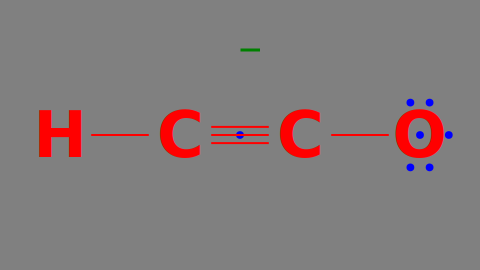

In [4]:
ipd.display(ipd.SVG(SVG))